
Warm-up: numpy
--------------

A third order polynomial, trained to predict $y=\sin(x)$ from $-\pi$
to $\pi$ by minimizing squared Euclidean distance.

This implementation uses numpy to manually compute the forward pass, loss, and
backward pass.

A numpy array is a generic n-dimensional array; it does not know anything about
deep learning or gradients or computational graphs, and is just a way to perform
generic numeric computations.



用三阶多项式函数 $y=a+bx+cx^2+dx^3$ 来拟合 $y=\sin(x)$ 在区间 $[-\pi,\pi]$ 上的点.

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

定义向量$x$是在区间$[-\pi,\pi]$上均匀取的2000个点，$y$是这2000个点所对应的函数值，这里的函数指$y=\sin(x)$. 这样，我们就得到了在函数$y=\sin(x)$ 位于区间$[-\pi,\pi]$上的2000个点. 我们接下来的操作就是想办法让三阶多项式函数$y=a+bx+cx^2+dx^3$来拟合这两千个点.

In [2]:
# Create random input and output data
x = np.linspace(-math.pi, math.pi, 2000)
y = np.sin(x)

由于三阶多项式函数$y=a+bx+cx^2+dx^3$的形状和位置完全由参数$a,b,c,d$决定，我们通过为这四个参数找到合适的值来使这个多项式函数能够较好地拟合刚才的那两千个点. 我们采取这样的策略：首先为这四个参数设置一个初始值，之后再逐渐调整这四个参数的值. 在这里，参数又被称为权重或权值.

In [3]:
# Randomly initialize weights
# 随机的初始权重
a = np.random.randn()
b = np.random.randn()
c = np.random.randn()
d = np.random.randn()

我们看一下当前参数下的三阶多项式函数所对应的曲线。注意，这条曲线也是由两千个点连接成的。

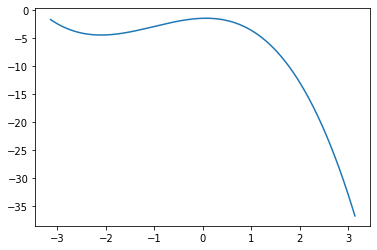

In [4]:
y_pred = a + b * x + c * x ** 2 + d * x ** 3
plt.plot(x,y_pred)

我们再看一下我们的优化目标.

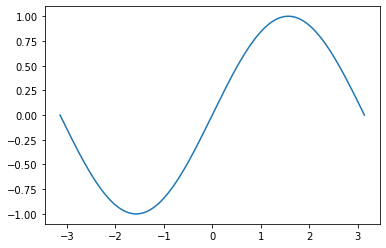

In [5]:
plt.plot(x,y)

可以看到，两者之间的差别很大。注意看两个函数曲线所在坐标系的刻度。

接下来，我们使用梯度下降法来逐步调整参数$a,b,c,d$的值，使得$y\_pred=a+bx+cx^2+dx^3$的函数曲线逐渐接近于$y=\sin(x)$的函数曲线（这里只考虑区间$[-\pi,\pi]$）。

我们先求出$y\_pred=a+bx+cx^2+dx^3$与$y=\sin(x)$之间的距离，并且把这个距离定义为三阶多项式模型$y=a+bx+cx^2+dx^3$的损失loss。这个距离的计算方法是：向量$x=[x_1,x_2,x_3,...,x_{2000}]$所对应的的$y\_pred=[y\_pred_1,y\_pred_2,y\_pred_3,...,y\_pred_{2000}]$和$y=[y_1,y_2,y_3,...,y_{2000}]$之间对应元素的差的平方和，即

$loss=(y\_pred_1-y_1)^2+(y\_pred_2-y_2)^2+(y\_pred_3-y_3)^2+...+(y\_pred_{2000}-y_{2000})^2=\sum_{i=1}^{2000}({y\_pred_i-y_i})^2$.

这个$loss$的值越大，两个函数曲线的距离越远；反之，则距离越近。三阶多项式模型$y\_pred=a+bx+cx^2+dx^3$的优化方向是，使得$loss$值逐渐变小，也就是让两条函数曲线逐渐接近。我们优化的方法是，根据$loss$更新参数$a,b,c,d$的值，再根据更新的参数重新计算$y\_pred=a+bx+cx^2+dx^3$与$y=\sin(x)$之间的距离，也就是新的$loss$值，再根据新的$loss$值更新参数$a,b,c,d$的值，...，如此循环迭代3000次。我们把控制每次迭代时参数的“变化程度”的量称为学习率，也就是learning rate。在这里，我们把学习率设置为0.000001。

接下来进入最核心的的环节，也就是梯度下降法的讲解。
首先，我们把函数曲线$y=\sin(x)$上的两千个点称为两千个训练样本，向量$x=[x_1,x_2,x_3,...,x_{2000}]$当中的2000个元素称为这两千个训练样本的特征，$y=[y_1,y_2,y_3,...,y_{2000}]$称为这两千个训练样本的真实值，$y\_pred=[y\_pred_1,y\_pred_2,y\_pred_3,...,y\_pred_{2000}]$称为多项式模型对这两千个训练样本的预测值，则$y=\sin(x)$就是真实曲线，多项式曲线$y\_pred=a+bx+cx^2+dx^3$就是预测曲线。对于每次迭代来说，参数$a,b,c,d$分别有一个变化，我们称为$\Delta a, \Delta b, \Delta c, \Delta d$。

每次迭代更新时，有

$a=a+\Delta a,\,b=b+\Delta b,\,c=c+\Delta c,\,d=d+\Delta d$.

我们把$\frac{\partial loss}{\partial a},\frac{\partial loss}{\partial b},\frac{\partial loss}{\partial c},
\frac{\partial loss}{\partial d}$分别称为$a,b,c,d$的梯度。
显然，$a,b,c,d$的移动方向是这几个变量的负梯度方向，大小和梯度相关，也与学习率相关。我们用$\eta$表示学习率，这样就有

$\Delta a=-\eta \cdot \frac{\partial loss}{\partial a}$,

$\Delta b=-\eta \cdot \frac{\partial loss}{\partial b}$,

$\Delta c=-\eta \cdot \frac{\partial loss}{\partial c}$,

$\Delta d=-\eta \cdot \frac{\partial loss}{\partial d}$.

我们取向量$x$上的某个点$x_i$，这个点所对应的$loss_i=(y\_pred_i-y_i)^2$。显然，$loss=loss_1+loss_2+...+loss_{2000}$，因此

$\frac{\partial loss}{\partial a}=\sum_{i=1}^{2000}\frac{\partial loss_i}{\partial a}$,

$\frac{\partial loss}{\partial b}=\sum_{i=1}^{2000}\frac{\partial loss_i}{\partial b}$,

$\frac{\partial loss}{\partial c}=\sum_{i=1}^{2000}\frac{\partial loss_i}{\partial c}$,

$\frac{\partial loss}{\partial d}=\sum_{i=1}^{2000}\frac{\partial loss_i}{\partial d}$.

而

$\frac{\partial loss_i}{\partial a}=\frac{\partial loss_i}{\partial y\_pred_i} \cdot \frac{\partial y\_pred_i}{\partial a}$,

$\frac{\partial loss_i}{\partial b}=\frac{\partial loss_i}{\partial y\_pred_i} \cdot \frac{\partial y\_pred_i}{\partial b}$,

$\frac{\partial loss_i}{\partial c}=\frac{\partial loss_i}{\partial y\_pred_i} \cdot \frac{\partial y\_pred_i}{\partial c}$,

$\frac{\partial loss_i}{\partial d}=\frac{\partial loss_i}{\partial y\_pred_i} \cdot \frac{\partial y\_pred_i}{\partial d}$.

因此，只需要求出$\frac{\partial loss_i}{\partial y\_pred_i}, \frac{\partial y\_pred_i}{\partial a},
\frac{\partial y\_pred_i}{\partial b}, \frac{\partial y\_pred_i}{\partial c}, \frac{\partial y\_pred_i}{\partial d}$
即可求出$\Delta a, \Delta b, \Delta c, \Delta d$。

显然，有

$\frac{\partial loss_i}{\partial y\_pred_i}=\frac{\partial(y\_pred_i-y_i)^2}{\partial y\_pred_i}=2(y\_pred_i-y_i)$,

$\frac{\partial y\_pred_i}{\partial a}=1, \frac{\partial y\_pred_i}{\partial b}=x_i, \frac{\partial y\_pred_i}{\partial c}=x_i^2, \frac{\partial y\_pred_i}{\partial d}=x_i^3$.

代入上面的公式，有

$\frac{\partial loss}{\partial a}=\sum_{i=1}^{2000}2(y\_pred_i-y_i)$,

$\frac{\partial loss}{\partial b}=\sum_{i=1}^{2000}2(y\_pred_i-y_i) \cdot x_i$,

$\frac{\partial loss}{\partial c}=\sum_{i=1}^{2000}2(y\_pred_i-y_i) \cdot x_i^2$,

$\frac{\partial loss}{\partial d}=\sum_{i=1}^{2000}2(y\_pred_i-y_i) \cdot x_i^3$.

接下来的程序直接使用了上述结论。在本程序当中，数学中的向量对应于numpy数组，学习率$\eta$对应于变量learning_rate，$a,b,c,d$的梯度$\frac{\partial loss}{\partial a},\frac{\partial loss}{\partial b},\frac{\partial loss}{\partial c},
\frac{\partial loss}{\partial d}$分别对应于变量grad_a, grad_b, grad_c, grad_d。

思考：程序中的grad_y_pred表示什么？

In [6]:
# 学习率0.000001
learning_rate = 1e-6
# 三千次迭代
for t in range(3000):
    # Forward pass: compute predicted y
    # y = a + b x + c x^2 + d x^3
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss
    loss = np.square(y_pred - y).sum()
    if t % 100 == 99:
        print(t, loss)

    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)         #注意，grad_y_pred是个数组
    grad_a = grad_y_pred.sum()               #a的梯度
    grad_b = (grad_y_pred * x).sum()         #b的梯度
    grad_c = (grad_y_pred * x ** 2).sum()    #c的梯度
    grad_d = (grad_y_pred * x ** 3).sum()    #d的梯度

    # Update weights
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d

# 输出预测函数
print(f'Result: y = {a} + {b} x + {c} x^2 + {d} x^3')

99 919.5982023056798
199 644.4407621905883
299 452.7422269726453
399 319.07667780759
499 225.80405415499743
599 160.6697336079056
699 115.15273722979194
799 83.32304416154717
899 61.05029952132243
999 45.45531533438273
1099 34.52950217299049
1199 26.870570170917233
1299 21.498810793039397
1399 17.729279274627917
1499 15.08279305947194
1599 13.22390766773345
1699 11.917658664735473
1799 10.999368904771362
1899 10.35355954444478
1999 9.899209527575636
2099 9.579445535043586
2199 9.354326136245476
2299 9.195788430664518
2399 9.08410704191076
2499 9.005411469741933
2599 8.949944548116008
2699 8.91084016226359
2799 8.883264991183554
2899 8.863815585914583
2999 8.85009463730578
Result: y = -0.005963966006321629 + 0.8556837113860623 x + 0.0010288833769131922 x^2 + -0.0931800212636041 x^3


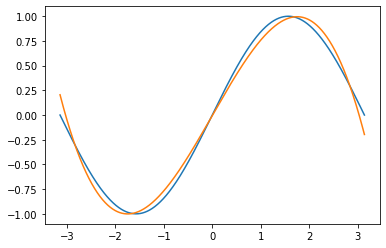

In [7]:
y_pred = a + b * x + c * x ** 2 + d * x ** 3
# 观察拟合效果
plt.plot(x,y) #蓝线是从y=sin(x)上取2000个点组成的曲线
plt.plot(x,y_pred) #橙线是模型的预测结果